 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
csv_whale=Path("../Resources/whale_returns.csv")
whale=pd.read_csv(csv_whale,index_col='Date',parse_dates=True,infer_datetime_format=True)

In [3]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale = whale.dropna()
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
csv_algo=Path("../Resources/algo_returns.csv")
algo=pd.read_csv(csv_algo,index_col='Date',parse_dates=True,infer_datetime_format=True)

In [6]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo = algo.dropna().copy()
algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
csv_sp=Path("../Resources/sp_tsx_history.csv")
sp=pd.read_csv(csv_sp,index_col='Date',parse_dates=True,infer_datetime_format=True)
sp.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp["Close"] = sp["Close"].str.replace("$", "",regex = True)
sp["Close"] = sp["Close"].str.replace(",", "",regex = True)
sp.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [11]:
sp["Close"] = sp["Close"].astype("float")
sp.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp = sp.pct_change()
sp.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [13]:
# Drop nulls
sp = sp.dropna().copy()
sp.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp.columns = sp.columns.str.replace('Close', 'SP')
sp.head()

,SP
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat(
    [whale, algo,sp], axis="columns", join="inner"
)
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

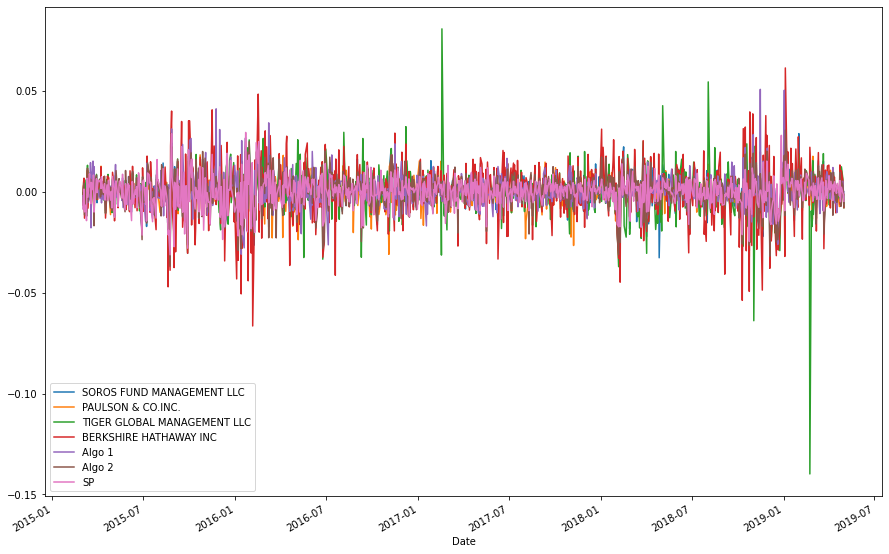

In [16]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(15,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

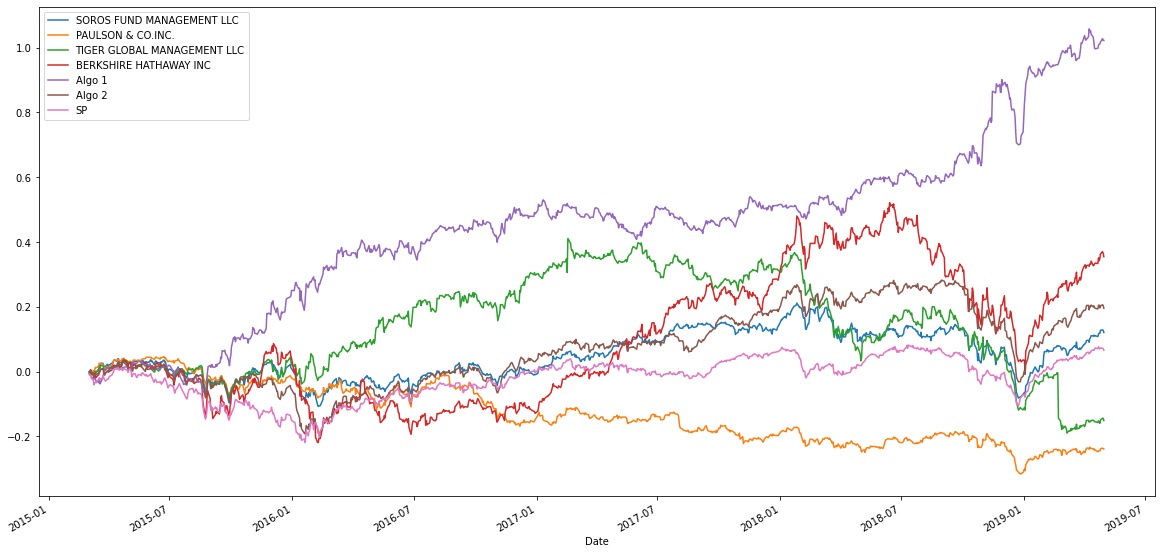

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+ combined_returns).cumprod()-1
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

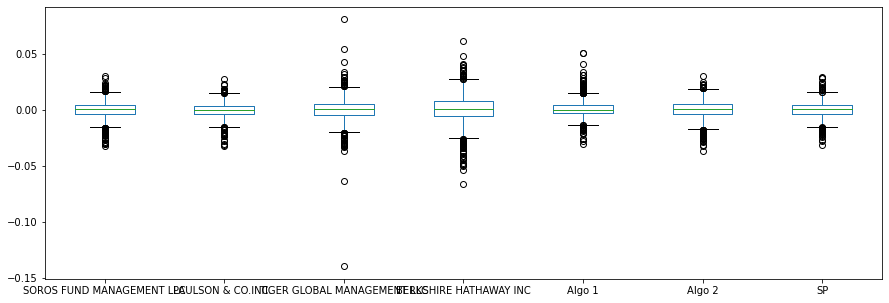

In [18]:
# Box plot to visually show risk
combined_returns.boxplot(figsize=(15,5),grid = False)

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
std_compare = combined_returns.std()
std_compare.sort_values(inplace=True)
std_compare

PAULSON & CO.INC.              0.006982
SP                             0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std = combined_returns['SP'].std()


In [21]:
# Determine which portfolios are riskier than the S&P TSX 60
sp_std > std_compare 

PAULSON & CO.INC.               True
SP                             False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [22]:
std_compare['BERKSHIRE HATHAWAY INC'] > std_compare

PAULSON & CO.INC.               True
SP                              True
Algo 1                          True
SOROS FUND MANAGEMENT LLC       True
Algo 2                          True
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC         False
dtype: bool

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP                             0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_returns.rolling(21).std()
rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:xlabel='Date'>

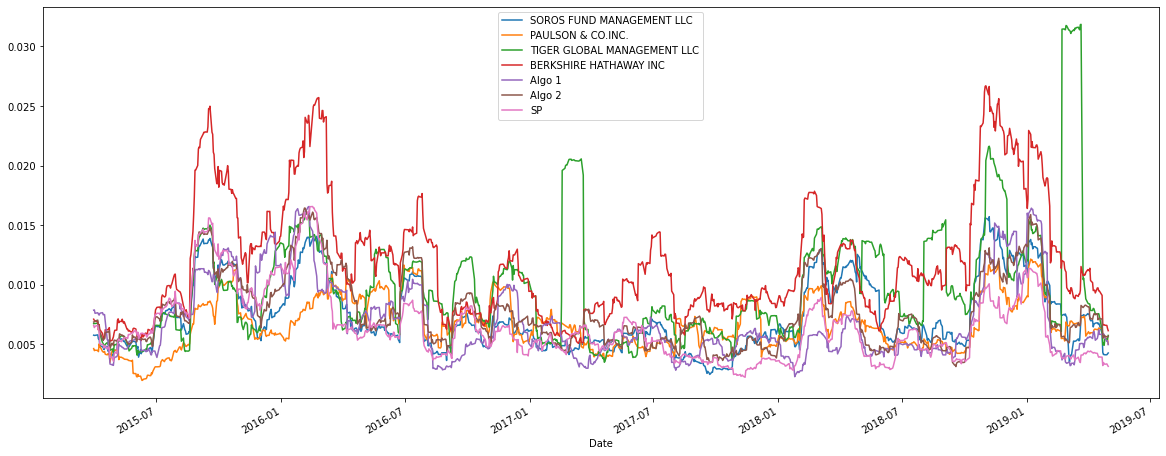

In [25]:
# Plot the rolling standard deviation
rolling_std.plot(figsize= (20,8))

### Calculate and plot the correlation

In [26]:
# Calculate the correlation
corr = combined_returns.corr()

<AxesSubplot:>

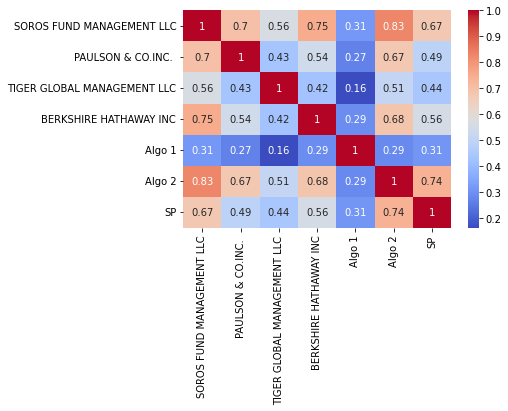

In [27]:
# Display de correlation matrix
sns.heatmap(corr,annot= True,cmap = 'coolwarm')

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [93]:
# Calculate covariance of a single portfolio
berk_covar= combined_returns['BERKSHIRE HATHAWAY INC'].cov
berk_covar

<bound method Series.cov of Date
2015-03-03   -0.006569
2015-03-04    0.004213
2015-03-05    0.006726
2015-03-06   -0.013098
2015-03-09   -0.001652
                ...   
2019-04-25    0.004848
2019-04-26    0.010434
2019-04-29    0.005223
2019-04-30   -0.003702
2019-05-01   -0.007833
Name: BERKSHIRE HATHAWAY INC, Length: 1029, dtype: float64>

In [94]:
# Calculate variance of S&P TSX
sp_var = combined_returns['SP'].rolling(window = 60).var()
sp_var

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: SP, Length: 1029, dtype: float64

In [95]:
# Computing beta
berkshire_sp_cov = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(combined_returns['SP'])
berkshire_sp_cov 

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000019
2019-04-26    0.000019
2019-04-29    0.000018
2019-04-30    0.000018
2019-05-01    0.000018
Length: 1029, dtype: float64

In [96]:
berkshire_sp_beta = berkshire_sp_cov/ sp_var 
berkshire_sp_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    1.243097
2019-04-26    1.245349
2019-04-29    1.207654
2019-04-30    1.229613
2019-05-01    1.221931
Length: 1029, dtype: float64

<AxesSubplot:xlabel='Date'>

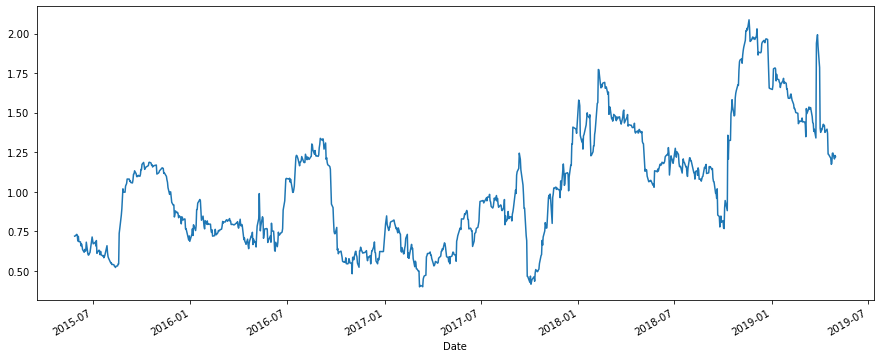

In [32]:
# Plot beta trend
berkshire_sp_beta.plot(figsize = (15,6))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

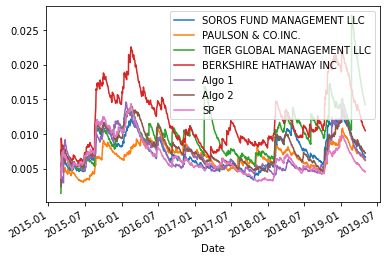

In [33]:
# Use `ewm` to calculate the rolling window
ewm = combined_returns.ewm(halflife=21).std()
ewm.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [34]:
# Annualized Sharpe Ratios
sharp_ratio = combined_returns.mean()/annualized_std


<AxesSubplot:>

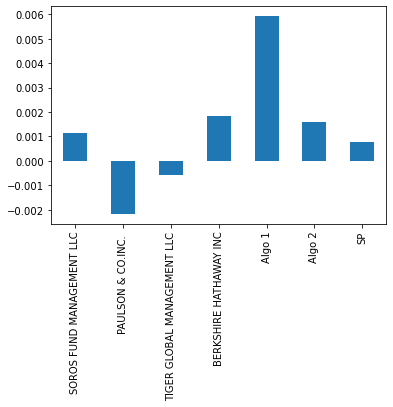

In [35]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot(kind = 'bar')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

both Algo1 and Algo 2 have a sginificant higher sharper ratio than S&P.
Algo 2 have a slightly lower sharper ratio than Berkshire hathaway. Which means BH may perform slightly better than Algo 2.
However Algo1 have have a very high and standout sharpe ratio than  the market and the whales protofolios.
Algo1 is definitely the winner.


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [36]:
# Reading data from 1st stock
csv_otex=Path('../Resources/otex_historical.csv')
otex_df=pd.read_csv(csv_otex,parse_dates = True, index_col = 'Date', infer_datetime_format = True)
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [37]:
# Reading data from 2nd stock
csv_shop=Path('../Resources/shop_historical.csv')
shop_df=pd.read_csv(csv_shop,parse_dates = True, index_col = 'Date', infer_datetime_format = True)
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [38]:
# Reading data from 3rd stock
csv_I=Path('../Resources/L_historical.csv')
l_df=pd.read_csv(csv_I,parse_dates = True, index_col = 'Date', infer_datetime_format = True)
l_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [39]:
# Combine all stocks in a single DataFrame
stock_join_df = pd.concat([otex_df,shop_df,l_df],axis='columns',join='inner')
stock_join_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,OTEX,43.58,SHOP,132.06,L,57.99
2018-01-03,OTEX,43.07,SHOP,135.15,L,57.41
2018-01-04,OTEX,42.91,SHOP,137.46,L,57.42
2018-01-05,OTEX,42.57,SHOP,137.26,L,57.42
2018-01-08,OTEX,42.16,SHOP,139.51,L,56.86


In [49]:
# Reset Date index
df = stock_join_df.drop(columns = ['Symbol'])
df.sort_index(ascending = True,inplace = True)
df.head()

,Close,Close,Close
Date,,,
2018-01-02,43.58,132.06,57.99
2018-01-03,43.07,135.15,57.41
2018-01-04,42.91,137.46,57.42
2018-01-05,42.57,137.26,57.42
2018-01-08,42.16,139.51,56.86


In [52]:
# Reorganize portfolio data by having a column per symbol
df.columns = ['OTEX', 'SHOP', 'L']
df.head()

,OTEX,SHOP,L
Date,,,
2018-01-02,43.58,132.06,57.99
2018-01-03,43.07,135.15,57.41
2018-01-04,42.91,137.46,57.42
2018-01-05,42.57,137.26,57.42
2018-01-08,42.16,139.51,56.86


In [60]:
# Calculate daily returns
daily_returns =  df.pct_change()
# Drop NAs
daily_returns.dropna(inplace = True)
# Display sample data
daily_returns.head()

,OTEX,SHOP,L
Date,,,
2018-01-03,-0.011703,0.023398,-0.010002
2018-01-04,-0.003715,0.017092,0.000174
2018-01-05,-0.007924,-0.001455,0.000000
2018-01-08,-0.009631,0.016392,-0.009753
2018-01-09,-0.000712,-0.011254,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [64]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns.isnull().mean() *100
portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [71]:
# Join your returns DataFrame to the original returns DataFrame
joinboth_df=pd.concat([combined_returns, portfolio_returns], axis =1, join= "inner")
joinboth_df.rename(columns = {0: 'Custom'},inplace = True)
joinboth_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP,Custom
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [75]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joinboth_df.dropna(inplace = True)
joinboth_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP                             0
Custom                         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [77]:
# Calculate the annualized `std`
Annual_std = joinboth_df.std() * np.sqrt(252)
Annual_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
SP                             0.099121
Custom                         0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

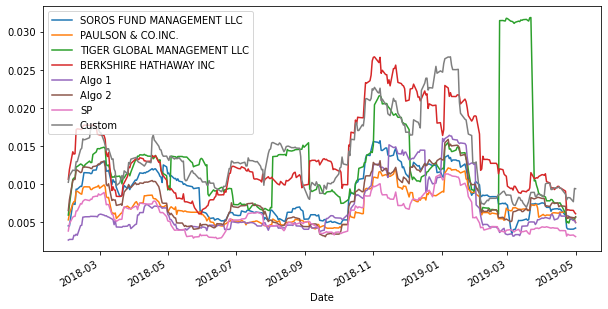

In [80]:
# Calculate rolling standard deviation
Rolling_std = joinboth_df.rolling(window = 21).std()
# Plot rolling standard deviation
Rolling_std.plot(figsize = (10,5))

### Calculate and plot the correlation

<AxesSubplot:>

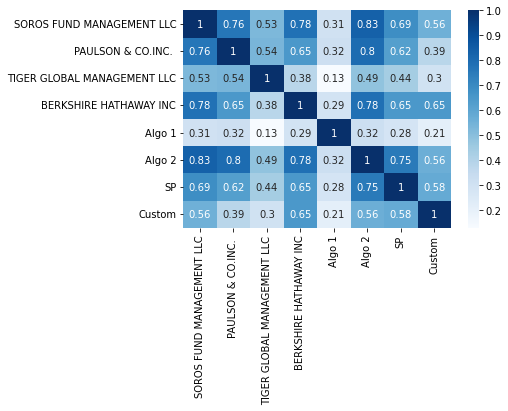

In [89]:
# Calculate and plot the correlation
with_custom_corr = joinboth_df.corr()
sns.heatmap(with_custom_corr,annot= True,cmap = 'Blues')

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [115]:
# Calculate and plot Beta
custom_sp_cov=joinboth_df['Custom'].rolling(window=30).cov(joinboth_df['SP'])
sp_var = combined_returns['SP'].rolling(window = 60).var()

In [117]:
#Custom_sp_beta:
custom_sp_beta =custom_sp_cov /sp_var
custom_sp_beta 

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.808064
2019-04-26    0.857481
2019-04-29    0.851618
2019-04-30    0.748205
2019-05-01    0.660866
Length: 1029, dtype: float64

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [125]:
# Calculate Annualized Sharpe Ratios
annual_sr_joinboth_df = joinboth_df.mean() / joinboth_df.std()

annual_sr_joinboth_df

SOROS FUND MANAGEMENT LLC     -0.005556
PAULSON & CO.INC.             -0.024963
TIGER GLOBAL MANAGEMENT LLC   -0.087663
BERKSHIRE HATHAWAY INC         0.012341
Algo 1                         0.119781
Algo 2                         0.001348
SP                             0.002183
Custom                         0.098557
dtype: float64

<AxesSubplot:>

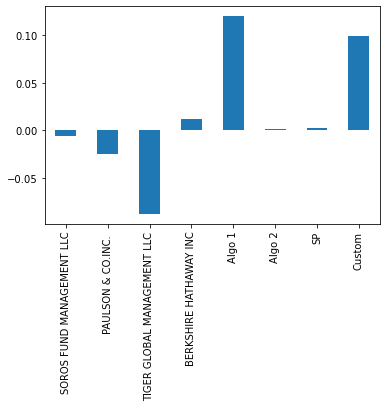

In [130]:
# Visualize the sharpe ratios as a bar plot
annual_sr_joinboth_df.plot(kind = 'bar')

### How does your portfolio do?

My portfolio was the second best performace comaring with all other portofolios and S&PTSX. 